In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Work Flow**
> - Define problem and goal
> - Import libraries and data
> - Describe data
> - Handling missing value
> - Feature selection
> - Feature engineering
> - Machine learning

**People Analytics**

> Machine learning memungkinkan para pembuat keputusan di departemen HR untuk memprediksi performance karyawan dalam 1 tahun kedepan menggunakan data histori KPI yang dimiliki perusahaan. Dalam kategori People Analytics, peserta diminta untuk membangun machine learning model yang dapat memprediksi performance karyawan dengan akurat.

**Task**

> Menggunakan data yang ada, prediksi apakah seorang employee akan tergolong kedalam best performance atau tidak

**Deskripsi Variabel**

- job_level : Level Jabatan Pekerja
- job_duration_in_current_job_level : Masa Kerja pada job level saat ini
- person_level : Level personal Pekerja
- job_duration_in_current_person_level : Masa Kerja pada person level saat ini
- job_duration_in_current_branch : Masa Kerja pada unit kerja saat ini
- Employee_type : Tipe Pekerja ( 3 tipe Relationship Manager, tipe A, B , dan C)
- Employee_status : Status Pekerja (tetap/kontrak)
- gender : Jenis Kelamin
- age : Tahun Lahir
- marital_status_maried(Y/N) : Status Pernikahan (Y / N)
- number_of_dependences : Jumlah anak dalam tanggungan
- number_of_dependences (male) : Jumlah anak dalam tanggungan khusus laki - laki
- number_of_dependences (female) : Jumlah anak dalam tanggungan khusus perempuan
- Education_level : Tingkat pendidikan
- GPA : IPK
- year_graduated : Tahun lulus
- job_duration_as_permanent_worker : lama bekerja sebagai pekerja tetap
- job_duration_from_training : lama bekerja mulai dari training
- branch_rotation : Jumlah rotasi pindah unit kerja
- job_rotation : jumlah rotasi pindah jabatan
- assign_of_otherposition : jumlah rotasi penugasan
- annual leave : cuti tahunan
- sick_leaves : izin sakit
- Best Performance : Termasuk dalam best performance (1/0)
- Avg_achievement_% : rata - rata presentase pencapaian terhadap target selama - setahun
- Last_achievement_% : presentase pencapaian triwulan terakhir terhadap target
- Achievement_above_100%_during3quartal : Jumlah pencapaian diatas 100% dalam 3 - tahun terkahir
- achievement_target_1 : status pencapaian target kategori 1
- achievement_target_2 : status pencapaian target kategori 2
- achievement_target_3 : status pencapaian target kategori 3

## Import libraries and data

In [ ]:
## Analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [ ]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/BRI-People Analytics/train.csv')
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/BRI-People Analytics/test.csv')

In [ ]:
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,1,0,1,NaN,NaN,NaN,7.0,7,4,6,11,2,1,1,95.170000,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,1,0,1,level_4,2.84,2009,5.0,5,2,2,0,2,0,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,0,0,0,level_4,3.28,2014,NaN,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,2,0,2,level_4,3.10,2006,7.0,7,5,4,0,3,2,0,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,1,0,1,level_4,3.69,2010,6.0,6,5,4,0,13,0,0,76.366667,79.65,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached


In [ ]:
df_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,1.42,PG05,1.42,0.50,RM_type_C,Permanent,Female,1983,Y,2,1,1,level_3,3.75,2004,13.0,14,7,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,1.58,PG03,1.58,2.00,RM_type_A,Permanent,Male,1988,N,0,0,0,level_4,3.07,2011,4.0,4,2,2,2,4,1,54.283333,42.97,0.0,Pencapaian < 50%,Pencapaian < 50%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1988,Y,1,0,1,level_4,3.23,2011,4.0,4,3,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached
3,JG05,8.00,PG06,5.00,1.50,RM_type_A,Permanent,Male,1973,Y,3,2,1,level_4,0.00,\N,22.0,22,8,5,11,3,0,74.390000,80.93,0.0,Pencapaian 50%-100%,Pencapaian < 50%,not reached
4,JG04,1.92,PG03,1.92,0.50,RM_type_A,Permanent,Female,1985,Y,1,1,0,level_3,3.86,2008,6.0,6,6,3,0,3,0,106.376667,109.09,3.0,Pencapaian 50%-100%,Pencapaian > 1.5,reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG03,2.75,PG01,2.75,2.75,RM_type_B,Permanent,Male,1987,N,0,0,0,level_4,0.00,0,3.0,3,1,1,0,1,0,49.396667,50.71,0.0,achiev_50%-100%,achiev_< 50%,not reached
5996,JG04,1.17,PG03,1.17,0.50,RM_type_B,Permanent,Male,1987,Y,1,0,1,level_3,3.40,2011,4.0,4,3,3,0,0,0,76.590000,77.70,0.0,achiev_50%-100%,achiev_< 50%,reached
5997,JG04,1.83,PG03,1.83,1.92,RM_type_A,Permanent,Male,1986,Y,2,1,1,level_4,3.47,2009,7.0,7,5,3,0,3,0,97.906667,111.49,3.0,achiev_100%-150%,achiev_100%-150%,reached
5998,JG04,1.92,PG03,1.92,1.25,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_4,3.22,2008,6.0,6,5,3,0,1,0,82.833333,81.64,0.0,achiev_100%-150%,achiev_50%-100%,not reached


## Describe data

In [ ]:
df_train.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
count,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,18502.000000,19950.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,15716.000000,15703.000000,15703.000000
mean,1.733252,1.555544,1.088203,1987.398682,0.746239,0.379232,0.366917,2.994603,4.872481,4.546876,2.889571,2.832265,0.818723,2.794138,0.898069,0.121245,66.344676,71.420847,0.682991
std,1.422136,0.954620,0.839882,4.274737,0.840026,0.606961,0.597422,11.699025,4.500514,4.519389,2.193424,1.751125,2.250188,2.822423,2.848540,0.326419,23.253675,24.095520,1.107861
min,0.000000,0.000000,0.000000,1963.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.260000,0.000000
25%,1.170000,1.080000,0.500000,1986.000000,0.000000,0.000000,0.000000,2.810000,3.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,51.675000,55.935000,0.000000
50%,1.580000,1.500000,0.830000,1988.000000,1.000000,0.000000,0.000000,3.090000,4.000000,4.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000,66.310833,71.410000,0.000000
75%,1.920000,1.830000,1.500000,1990.000000,1.000000,1.000000,1.000000,3.300000,6.000000,5.000000,3.000000,3.000000,0.000000,5.000000,1.000000,0.000000,81.930833,88.350000,1.000000
max,8.750000,8.000000,7.500000,2017.000000,7.000000,4.000000,4.000000,381.000000,34.000000,35.000000,22.000000,15.000000,54.000000,41.000000,132.000000,1.000000,129.010000,130.000000,3.000000


In [ ]:
df_train.describe(include='object')

,job_level,person_level,Employee_type,Employee_status,gender,marital_status_maried(Y/N),Education_level,year_graduated,achievement_target_1,achievement_target_2,achievement_target_3
count,22005,22005,21993,22005,22005,22005,18397,18502,15278,15278,15278
unique,4,8,3,2,2,2,6,52,9,9,3
top,JG04,PG03,RM_type_A,Permanent,Male,Y,level_4,2013,achiev_50%-100%,achiev_< 50%,reached
freq,19158,18342,11030,19950,16335,15659,15313,2552,7679,8615,10985


In [ ]:
datadesc = []
for i in df_train.columns:
    datadesc.append([
        i,
        df_train[i].dtypes,
        df_train[i].isna().sum(),
        round((df_train[i].isna().sum() / len(df_train)) * 100),
        df_train[i].nunique(),
        df_train[i].drop_duplicates().sample(2).values
    ])
    
desc = pd.DataFrame(data=datadesc, columns=['Data Features','Data Types','Null','% Null','Nunique','Unique_sample'])
desc

,Data Features,Data Types,Null,% Null,Nunique,Unique_sample
0,job_level,object,0,0,4,"[JG05, JG04]"
1,job_duration_in_current_job_level,float64,0,0,102,"[6.17, 0.67]"
2,person_level,object,0,0,8,"[PG02, PG07]"
3,job_duration_in_current_person_level,float64,0,0,86,"[1.0, 1.67]"
4,job_duration_in_current_branch,float64,0,0,71,"[2.83, 0.58]"
5,Employee_type,object,12,0,3,"[RM_type_C, nan]"
6,Employee_status,object,0,0,2,"[Contract, Permanent]"
7,gender,object,0,0,2,"[Female, Male]"
8,age,int64,0,0,37,"[1994, 1980]"
9,marital_status_maried(Y/N),object,0,0,2,"[Y, N]"


In [ ]:
df_test.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.297695,1.946135,1.243603,1985.727333,0.989167,0.49900,0.490167,3.016402,6.364833,6.425167,3.769167,3.525500,1.155167,3.742500,1.069500,66.803815,72.163333,0.680000
std,1.733171,1.027715,0.897269,4.791883,0.886292,0.66061,0.668065,11.952714,5.167448,5.273332,2.414854,1.814543,2.515315,2.688506,2.606173,22.466927,23.021764,1.107612
min,0.000000,0.000000,0.000000,1963.000000,0.000000,0.00000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.803333,4.520000,0.000000
25%,1.500000,1.500000,0.500000,1984.000000,0.000000,0.00000,0.000000,2.800000,4.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,52.085833,56.315000,0.000000
50%,1.830000,1.830000,1.250000,1987.000000,1.000000,0.00000,0.000000,3.070000,5.000000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,65.981667,71.400000,0.000000
75%,2.000000,1.920000,1.500000,1989.000000,2.000000,1.00000,1.000000,3.260000,6.000000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,81.530833,88.272500,1.000000
max,8.330000,8.000000,5.830000,1996.000000,5.000000,4.00000,4.000000,368.000000,36.000000,36.000000,17.000000,14.000000,29.000000,21.000000,77.000000,129.110000,130.000000,3.000000


In [ ]:
df_test.describe(include='object')

,job_level,person_level,Employee_type,Employee_status,gender,marital_status_maried(Y/N),Education_level,year_graduated,achievement_target_1,achievement_target_2,achievement_target_3
count,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
unique,3,7,3,1,2,2,6,50,9,9,3
top,JG04,PG03,RM_type_A,Permanent,Male,Y,level_4,2011,achiev_50%-100%,achiev_< 50%,reached
freq,5592,5154,3920,6000,4407,5094,4948,893,2906,3403,4342


## Handling missing value

In [ ]:
df_train.isna().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3608
GPA                                      3503
year_graduated                           3503
job_duration_as_permanent_worker         2055
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                      

In [ ]:
df_test.isna().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
Employee_status                          0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
number_of_dependences (male)             0
number_of_dependences (female)           0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_as_permanent_worker         0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Avg_achieve

### achievement_target_1

In [ ]:
df_train['achievement_target_1'].describe()

count               15278
unique                  9
top       achiev_50%-100%
freq                 7679
Name: achievement_target_1, dtype: object

In [ ]:
df_train['achievement_target_1'].unique()

array(['achiev_50%-100%', 'achiev_100%-150%', 'achiev_< 50%',
       'achiev_> 1.5', nan, 'Tidak diberikan target',
       'Pencapaian 50%-100%', 'Pencapaian 100%-150%', 'Pencapaian < 50%',
       'Pencapaian > 1.5'], dtype=object)

In [ ]:
df_train['achievement_target_1'].value_counts()

achiev_50%-100%           7679
achiev_100%-150%          2519
achiev_< 50%              2065
Pencapaian 50%-100%       1531
achiev_> 1.5               597
Pencapaian 100%-150%       485
Tidak diberikan target     178
Pencapaian < 50%           175
Pencapaian > 1.5            49
Name: achievement_target_1, dtype: int64

In [ ]:
df_test['achievement_target_1'].describe()

count                6000
unique                  9
top       achiev_50%-100%
freq                 2906
Name: achievement_target_1, dtype: object

In [ ]:
df_test['achievement_target_1'].unique()

array(['achiev_50%-100%', 'Pencapaian < 50%', 'Pencapaian 50%-100%',
       'achiev_100%-150%', 'achiev_< 50%', 'Tidak diberikan target',
       'Pencapaian 100%-150%', 'achiev_> 1.5', 'Pencapaian > 1.5'],
      dtype=object)

In [ ]:
df_test['achievement_target_1'].value_counts()

achiev_50%-100%           2906
achiev_100%-150%           956
achiev_< 50%               873
Pencapaian 50%-100%        651
achiev_> 1.5               239
Pencapaian 100%-150%       216
Pencapaian < 50%            72
Tidak diberikan target      60
Pencapaian > 1.5            27
Name: achievement_target_1, dtype: int64

In [ ]:
df_train['achievement_target_1'].replace('achiev_50%-100%', 'Pencapaian 50%-100%', inplace=True)
df_train['achievement_target_1'].replace('achiev_100%-150%', 'Pencapaian 100%-150%', inplace=True)
df_train['achievement_target_1'].replace('achiev_< 50%', 'Pencapaian < 50%', inplace=True)
df_train['achievement_target_1'].replace('achiev_> 1.5', 'Pencapaian > 1.5', inplace=True)

df_test['achievement_target_1'].replace('achiev_50%-100%', 'Pencapaian 50%-100%', inplace=True)
df_test['achievement_target_1'].replace('achiev_100%-150%', 'Pencapaian 100%-150%', inplace=True)
df_test['achievement_target_1'].replace('achiev_< 50%', 'Pencapaian < 50%', inplace=True)
df_test['achievement_target_1'].replace('achiev_> 1.5', 'Pencapaian > 1.5', inplace=True)

In [ ]:
df_train['achievement_target_1'].value_counts()

Pencapaian 50%-100%       9210
Pencapaian 100%-150%      3004
Pencapaian < 50%          2240
Pencapaian > 1.5           646
Tidak diberikan target     178
Name: achievement_target_1, dtype: int64

In [ ]:
df_test['achievement_target_1'].value_counts()

Pencapaian 50%-100%       3557
Pencapaian 100%-150%      1172
Pencapaian < 50%           945
Pencapaian > 1.5           266
Tidak diberikan target      60
Name: achievement_target_1, dtype: int64

In [ ]:
df_train['achievement_target_1'].fillna('Pencapaian 50%-100%', inplace=True)

### achievement_target_2

In [ ]:
df_train['achievement_target_2'].describe()

count            15278
unique               9
top       achiev_< 50%
freq              8615
Name: achievement_target_2, dtype: object

In [ ]:
df_train['achievement_target_2'].unique()

array(['achiev_< 50%', 'achiev_50%-100%', 'achiev_> 1.5',
       'achiev_100%-150%', nan, 'Tidak diberikan target',
       'Pencapaian 100%-150%', 'Pencapaian < 50%', 'Pencapaian 50%-100%',
       'Pencapaian > 1.5'], dtype=object)

In [ ]:
df_train['achievement_target_2'].value_counts()

achiev_< 50%              8615
achiev_50%-100%           2366
Pencapaian < 50%          1542
achiev_> 1.5               954
achiev_100%-150%           925
Pencapaian 50%-100%        484
Tidak diberikan target     176
Pencapaian 100%-150%       145
Pencapaian > 1.5            71
Name: achievement_target_2, dtype: int64

In [ ]:
df_test['achievement_target_2'].describe()

count             6000
unique               9
top       achiev_< 50%
freq              3403
Name: achievement_target_2, dtype: object

In [ ]:
df_test['achievement_target_2'].unique()

array(['achiev_< 50%', 'Pencapaian < 50%', 'Pencapaian > 1.5',
       'achiev_50%-100%', 'achiev_100%-150%', 'achiev_> 1.5',
       'Pencapaian 50%-100%', 'Pencapaian 100%-150%',
       'Tidak diberikan target'], dtype=object)

In [ ]:
df_test['achievement_target_2'].value_counts()

achiev_< 50%              3403
achiev_50%-100%            850
Pencapaian < 50%           644
achiev_> 1.5               370
achiev_100%-150%           353
Pencapaian 50%-100%        212
Pencapaian 100%-150%        78
Tidak diberikan target      59
Pencapaian > 1.5            31
Name: achievement_target_2, dtype: int64

In [ ]:
df_train['achievement_target_2'].replace('achiev_< 50%', 'Pencapaian < 50%', inplace=True)
df_train['achievement_target_2'].replace('achiev_50%-100%', 'Pencapaian 50%-100%', inplace=True)
df_train['achievement_target_2'].replace('achiev_> 1.5', 'Pencapaian > 1.5', inplace=True)
df_train['achievement_target_2'].replace('achiev_100%-150%', 'Pencapaian 100%-150%', inplace=True)

df_test['achievement_target_2'].replace('achiev_< 50%', 'Pencapaian < 50%', inplace=True)
df_test['achievement_target_2'].replace('achiev_50%-100%', 'Pencapaian 50%-100%', inplace=True)
df_test['achievement_target_2'].replace('achiev_> 1.5', 'Pencapaian > 1.5', inplace=True)
df_test['achievement_target_2'].replace('achiev_100%-150%', 'Pencapaian 100%-150%', inplace=True)

In [ ]:
df_train['achievement_target_2'].value_counts()

Pencapaian < 50%          10157
Pencapaian 50%-100%        2850
Pencapaian 100%-150%       1070
Pencapaian > 1.5           1025
Tidak diberikan target      176
Name: achievement_target_2, dtype: int64

In [ ]:
df_test['achievement_target_2'].value_counts()

Pencapaian < 50%          4047
Pencapaian 50%-100%       1062
Pencapaian 100%-150%       431
Pencapaian > 1.5           401
Tidak diberikan target      59
Name: achievement_target_2, dtype: int64

In [ ]:
df_train['achievement_target_2'].fillna('Pencapaian < 50%', inplace=True)

### achievement_target_3

In [ ]:
df_train['achievement_target_3'].describe()

count       15278
unique          3
top       reached
freq        10985
Name: achievement_target_3, dtype: object

In [ ]:
df_train['achievement_target_3'].unique()

array(['reached', 'not_reached', nan, 'not reached'], dtype=object)

In [ ]:
df_train['achievement_target_3'].value_counts()

reached        10985
not reached     4275
not_reached       18
Name: achievement_target_3, dtype: int64

In [ ]:
df_test['achievement_target_3'].describe()

count        6000
unique          3
top       reached
freq         4342
Name: achievement_target_3, dtype: object

In [ ]:
df_test['achievement_target_3'].unique()

array(['reached', 'not reached', 'not_reached'], dtype=object)

In [ ]:
df_test['achievement_target_3'].value_counts()

reached        4342
not reached    1654
not_reached       4
Name: achievement_target_3, dtype: int64

In [ ]:
df_train['achievement_target_3'].replace('not_reached', 'not reached', inplace=True)
df_test['achievement_target_3'].replace('not_reached', 'not reached', inplace=True)

In [ ]:
df_train['achievement_target_3'].value_counts()

reached        10985
not reached     4293
Name: achievement_target_3, dtype: int64

In [ ]:
df_test['achievement_target_3'].value_counts()

reached        4342
not reached    1658
Name: achievement_target_3, dtype: int64

In [ ]:
df_train['achievement_target_3'].fillna('reached', inplace=True)

### Last_achievement_%

In [ ]:
df_train['Last_achievement_%'].describe()

count    15703.000000
mean        71.420847
std         24.095520
min          4.260000
25%         55.935000
50%         71.410000
75%         88.350000
max        130.000000
Name: Last_achievement_%, dtype: float64

In [ ]:
Q1 = df_train['Last_achievement_%'].describe()['25%']
Q3 = df_train['Last_achievement_%'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 136.97249999999997
lower_fence: 7.312500000000014


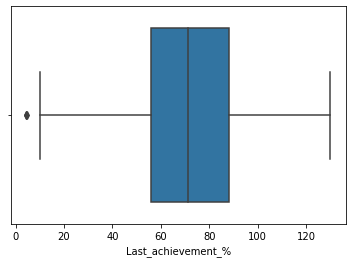

In [ ]:
sns.boxplot(df_train['Last_achievement_%'])

In [ ]:
df_train['Last_achievement_%'].fillna(df_train['Last_achievement_%'].median(), inplace=True)

In [ ]:
df_test['Last_achievement_%'].describe()

count    6000.000000
mean       72.163333
std        23.021764
min         4.520000
25%        56.315000
50%        71.400000
75%        88.272500
max       130.000000
Name: Last_achievement_%, dtype: float64

In [ ]:
df_test['Last_achievement_%'].nunique()

4248

### Achievement_above_100%_during3quartal

In [ ]:
df_train['Achievement_above_100%_during3quartal'].describe()

count    15703.000000
mean         0.682991
std          1.107861
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: Achievement_above_100%_during3quartal, dtype: float64

In [ ]:
df_train['Achievement_above_100%_during3quartal'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [ ]:
df_train['Achievement_above_100%_during3quartal'].value_counts()

0.0    10677
3.0     2237
1.0     1564
2.0     1225
Name: Achievement_above_100%_during3quartal, dtype: int64

In [ ]:
df_train['Achievement_above_100%_during3quartal'].fillna(0, inplace=True)

In [ ]:
df_test['Achievement_above_100%_during3quartal'].describe()

count    6000.000000
mean        0.680000
std         1.107612
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Achievement_above_100%_during3quartal, dtype: float64

In [ ]:
df_test['Achievement_above_100%_during3quartal'].unique()

array([1., 0., 3., 2.])

In [ ]:
df_test['Achievement_above_100%_during3quartal'].value_counts()

0.0    4087
3.0     860
1.0     606
2.0     447
Name: Achievement_above_100%_during3quartal, dtype: int64

### Avg_achievement_%

In [ ]:
df_train['Avg_achievement_%'].describe()

count    15716.000000
mean        66.344676
std         23.253675
min          0.000000
25%         51.675000
50%         66.310833
75%         81.930833
max        129.010000
Name: Avg_achievement_%, dtype: float64

In [ ]:
df_train['Avg_achievement_%'].nunique()

12186

In [ ]:
Q1 = df_train['Avg_achievement_%'].describe()['25%']
Q3 = df_train['Avg_achievement_%'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 127.31458333333336
lower_fence: 6.291249999999984


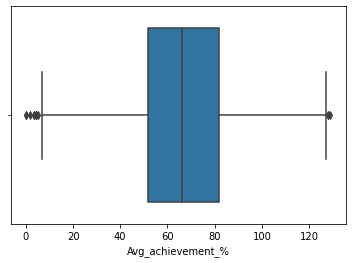

In [ ]:
sns.boxplot(df_train['Avg_achievement_%'])

In [ ]:
df_train['Avg_achievement_%'].fillna(df_train['Avg_achievement_%'].median(), inplace=True)

In [ ]:
df_test['Avg_achievement_%'].describe()

count    6000.000000
mean       66.803815
std        22.466927
min         7.803333
25%        52.085833
50%        65.981667
75%        81.530833
max       129.110000
Name: Avg_achievement_%, dtype: float64

In [ ]:
df_test['Avg_achievement_%'].nunique()

5425

### Education_level

In [ ]:
df_train['Education_level'].describe()

count       18397
unique          6
top       level_4
freq        15313
Name: Education_level, dtype: object

In [ ]:
df_train['Education_level'].unique()

array(['level_4', 'level_5', 'level_3', nan, 'level_1', 'level_2',
       'level_0'], dtype=object)

In [ ]:
df_train['Education_level'].value_counts()

level_4    15313
level_3     2804
level_1      192
level_5       64
level_0       16
level_2        8
Name: Education_level, dtype: int64

In [ ]:
df_test['Education_level'].describe()

count        6000
unique          6
top       level_4
freq         4948
Name: Education_level, dtype: object

In [ ]:
df_test['Education_level'].unique()

array(['level_3', 'level_4', 'level_5', 'level_1', 'level_0', 'level_2'],
      dtype=object)

In [ ]:
df_test['Education_level'].value_counts()

level_4    4948
level_3     923
level_1      98
level_5      26
level_0       4
level_2       1
Name: Education_level, dtype: int64

In [ ]:
df_train['Education_level'].fillna('level_4', inplace=True)

### GPA

In [ ]:
df_train['GPA'].describe()

count    18502.000000
mean         2.994603
std         11.699025
min          0.000000
25%          2.810000
50%          3.090000
75%          3.300000
max        381.000000
Name: GPA, dtype: float64

In [ ]:
df_train['GPA'].nunique()

241

In [ ]:
Q1 = df_train['GPA'].describe()['25%']
Q3 = df_train['GPA'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * 100)
lower_fence = Q1 - (1.5 * 100)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 153.3
lower_fence: -147.19


In [ ]:
df_test['GPA'].describe()

count    6000.000000
mean        3.016402
std        11.952714
min         0.000000
25%         2.800000
50%         3.070000
75%         3.260000
max       368.000000
Name: GPA, dtype: float64

In [ ]:
df_train['GPA'].fillna(df_train['GPA'].median(), inplace=True)

### year_graduated

In [ ]:
df_train['year_graduated'].describe()

count     18502
unique       52
top        2013
freq       2552
Name: year_graduated, dtype: object

In [ ]:
df_train['year_graduated'].unique()

array(['1987', '2001', '2007', '2006', nan, '2008', '2011', '2010',
       '2013', '2014', '\\N', '1996', '2009', '2005', '2012', '1989',
       '1992', '0', '2000', '1994', '1997', '1993', '1995', '2004',
       '2015', '1986', '1999', '2003', '2016', '2044', '2018', '1991',
       '2002', '2017', '2201', '1998', '1990', '9999', '1984', '2020',
       '1988', '1983', '1985', '201', '2019', '2031', '____', '3016', '-',
       '2200', '102', '2999', '9464'], dtype=object)

In [ ]:
## yg ga bener
"""'\\N','9999','____','-','102','2999','9464'"""

## kemungkinan typo
"""'2031' jadi '2001' atau '2011'
'2044' jadi '2004'
'2201' jadi '2001'
'201' jadi '2001' atau '2011'
'3016' jadi '2016'
'2200' jadi '2000'"""

"'2031' jadi '2001' atau '2011'\n'2044' jadi '2004'\n'2201' jadi '2001'\n'201' jadi '2001' atau '2011'\n'3016' jadi '2016'\n'2200' jadi '2000'"

In [ ]:
df_train['year_graduated'].value_counts().tail()

2020    1
9464    1
102     1
3016    1
2031    1
Name: year_graduated, dtype: int64

In [ ]:
df_test['year_graduated'].describe()

count     6000
unique      50
top       2011
freq       893
Name: year_graduated, dtype: object

In [ ]:
df_test['year_graduated'].unique()

array(['2004', '2011', '\\N', '2008', '1999', '2006', '2015', '2014',
       '2010', '9999', '2012', '2009', '2003', '2007', '2005', '2013',
       '207', '0', '1998', '3.05', '2002', '1989', '2016', '3.18', '2001',
       '2201', '2000', '1993', '1992', '1990', '1995', '1996', '2999',
       '2018', '1997', '209', '1994', '1991', '1016', '1986', '2017',
       '1982', '1984', '1988', '2019', '1983', '1985', '1987', '.',
       '3013'], dtype=object)

In [ ]:
## yg ga bener
"""'\\N','9999','3.05','3.18','2999','.'"""

## kemungkian typo
"""'207' jadi '2007' atau '2017'
'2201' jadi '2001'
'209' jadi '2009' atau '2019'
'1016'jadi '2016'
'3013' jadi '2013'"""

"'207' jadi '2007' atau '2017'\n'2201' jadi '2001'\n'209' jadi '2009' atau '2019'\n'1016'jadi '2016'\n'3013' jadi '2013'"

In [ ]:
df_test['year_graduated'].value_counts().tail()

209     1
1982    1
1983    1
.       1
207     1
Name: year_graduated, dtype: int64

In [ ]:
df_train['year_graduated'].fillna('2013', inplace=True)
df_train['year_graduated'].replace('2031', '2011', inplace=True)
df_train['year_graduated'].replace('2044', '2004', inplace=True)
df_train['year_graduated'].replace('2201', '2001', inplace=True)
df_train['year_graduated'].replace('201', '2011', inplace=True)
df_train['year_graduated'].replace('3016', '2016', inplace=True)
df_train['year_graduated'].replace('2200', '2000', inplace=True)
df_train['year_graduated'].replace('\\N', '2013', inplace=True)
df_train['year_graduated'].replace('9999', '2013', inplace=True)
df_train['year_graduated'].replace('____', '2013', inplace=True)
df_train['year_graduated'].replace('-', '2013', inplace=True)
df_train['year_graduated'].replace('2999', '2000', inplace=True)
df_train['year_graduated'].replace('9464', '2013', inplace=True)
df_train['year_graduated'].replace('102', '2013', inplace=True)

df_test['year_graduated'].replace('207', '2007', inplace=True)
df_test['year_graduated'].replace('2201', '2001', inplace=True)
df_test['year_graduated'].replace('209', '2009', inplace=True)
df_test['year_graduated'].replace('1016', '2016', inplace=True)
df_test['year_graduated'].replace('3013', '2013', inplace=True)
df_test['year_graduated'].replace('\\N', '2011', inplace=True)
df_test['year_graduated'].replace('9999', '2011', inplace=True)
df_test['year_graduated'].replace('3.05', '2011', inplace=True)
df_test['year_graduated'].replace('3.18', '2011', inplace=True)
df_test['year_graduated'].replace('.', '2011', inplace=True)
df_test['year_graduated'].replace('2999', '2000', inplace=True)

In [ ]:
df_train['year_graduated'].unique()

array(['1987', '2001', '2007', '2006', '2013', '2008', '2011', '2010',
       '2014', '1996', '2009', '2005', '2012', '1989', '1992', '0',
       '2000', '1994', '1997', '1993', '1995', '2004', '2015', '1986',
       '1999', '2003', '2016', '2018', '1991', '2002', '2017', '1998',
       '1990', '1984', '2020', '1988', '1983', '1985', '2019'],
      dtype=object)

In [ ]:
df_test['year_graduated'].unique()

array(['2004', '2011', '2008', '1999', '2006', '2015', '2014', '2010',
       '2012', '2009', '2003', '2007', '2005', '2013', '0', '1998',
       '2002', '1989', '2016', '2001', '2000', '1993', '1992', '1990',
       '1995', '1996', '2018', '1997', '1994', '1991', '1986', '2017',
       '1982', '1984', '1988', '2019', '1983', '1985', '1987'],
      dtype=object)

In [ ]:
df_train['year_graduated'] = df_train['year_graduated'].astype('int')
df_test['year_graduated'] = df_test['year_graduated'].astype('int')

In [ ]:
df_train['year_graduated'].dtypes

dtype('int64')

In [ ]:
df_test['year_graduated'].dtypes

dtype('int64')

### job_duration_as_permanent_worker

In [ ]:
df_train['job_duration_as_permanent_worker'].describe()

count    19950.000000
mean         4.872481
std          4.500514
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         34.000000
Name: job_duration_as_permanent_worker, dtype: float64

In [ ]:
df_train['job_duration_as_permanent_worker'].unique()

array([30., 15.,  8.,  7.,  6.,  5.,  4.,  3.,  2., 24., 25., 29., 17.,
       28., 26., nan, 18.,  1., 22., 13., 23., 32., 16., 27., 12., 31.,
       20., 19., 21., 33., 14., 10., 34., 11.])

In [ ]:
df_train['job_duration_as_permanent_worker'].value_counts().head()

4.0    4290
1.0    3217
6.0    2989
5.0    2873
3.0    2492
Name: job_duration_as_permanent_worker, dtype: int64

In [ ]:
df_test['job_duration_as_permanent_worker'].describe()

count    6000.000000
mean        6.364833
std         5.167448
min         2.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        36.000000
Name: job_duration_as_permanent_worker, dtype: float64

In [ ]:
df_test['job_duration_as_permanent_worker'].unique()

array([13.,  4., 22.,  6., 12.,  3.,  2.,  7., 30.,  5., 15., 25., 14.,
       16., 20., 28., 24., 29., 31.,  8., 17., 23., 27., 18., 19., 26.,
       36., 21., 32., 33.])

In [ ]:
df_test['job_duration_as_permanent_worker'].value_counts().head()

6.0    1426
5.0    1129
3.0    1093
4.0     964
7.0     344
Name: job_duration_as_permanent_worker, dtype: int64

In [ ]:
df_train['job_duration_as_permanent_worker'].fillna(4, inplace=True)

In [ ]:
df_train.dropna(inplace=True) ## dropna karena NaN di kolom Employee_type sangat sedikit < 1%

In [ ]:
df_train.isna().sum() ## data sudah bersih dari NaN values

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
Employee_status                          0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
number_of_dependences (male)             0
number_of_dependences (female)           0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_as_permanent_worker         0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Best Perfor

## Exploratory Data Analysis

### Sweetviz

In [ ]:
! pip install sweetviz

In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(df_train)
analyze_report.show_html('BRI-hr-analytics.html', open_browser=False)


Report BRI-hr-analytics.html was generated.


In [ ]:
import IPython
IPython.display.HTML('BRI-hr-analytics.html')

Output hidden; open in https://colab.research.google.com to view.

**Cek outlier job_duration_in_current_job_level**

In [ ]:
Q1 = df_train['job_duration_in_current_job_level'].describe()['25%']
Q3 = df_train['job_duration_in_current_job_level'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 3.045
lower_fence: 0.04499999999999993


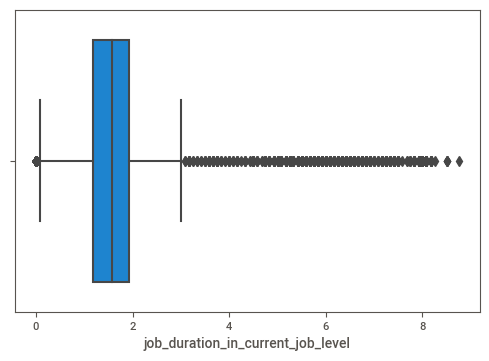

In [ ]:
sns.boxplot(df_train['job_duration_in_current_job_level'])

**Cek outlier job_duration_in_current_person_level**

In [ ]:
Q1 = df_train['job_duration_in_current_person_level'].describe()['25%']
Q3 = df_train['job_duration_in_current_person_level'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 2.955
lower_fence: -0.04499999999999993


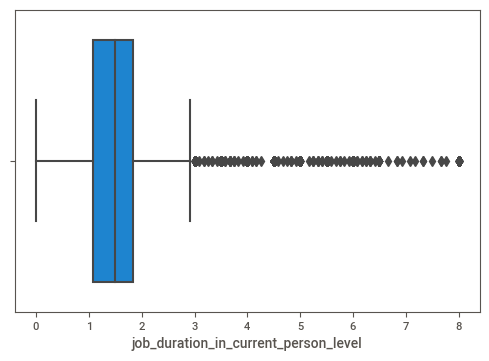

In [ ]:
sns.boxplot(df_train['job_duration_in_current_person_level'])

**Cek outlier job_duration_in_current_branch**

In [ ]:
Q1 = df_train['job_duration_in_current_branch'].describe()['25%']
Q3 = df_train['job_duration_in_current_branch'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 3.0
lower_fence: -1.0


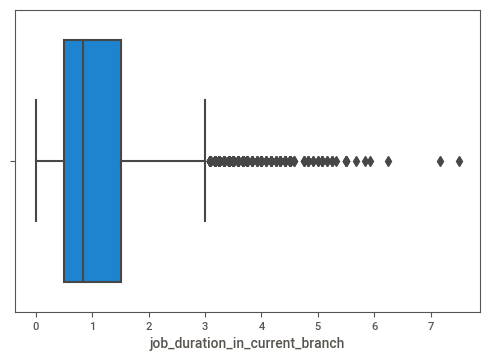

In [ ]:
sns.boxplot(df_train['job_duration_in_current_branch'])

**Drop data dengan tahun lahir 2017**

In [ ]:
df_train = df_train[df_train['age'] != 2017]

**Cek outlier age**

In [ ]:
Q1 = df_train['age'].describe()['25%']
Q3 = df_train['age'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 1996.0
lower_fence: 1980.0


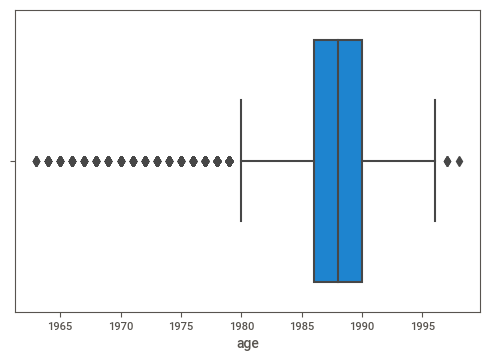

In [ ]:
sns.boxplot(df_train['age'])

**Batasi GPA sampai 4.0**

In [ ]:
df_train = df_train[df_train['GPA'] <= 4.0]

**Cek outlier job_duration_as_permanent_worker**

In [ ]:
Q1 = df_train['job_duration_as_permanent_worker'].describe()['25%']
Q3 = df_train['job_duration_as_permanent_worker'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 8.0
lower_fence: 0.0


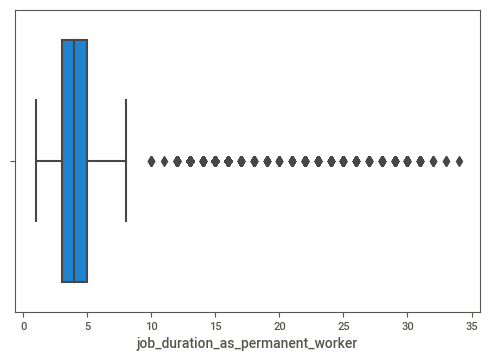

In [ ]:
sns.boxplot(df_train['job_duration_as_permanent_worker'])

**Cek outlier job_duration_from_training**

In [ ]:
Q1 = df_train['job_duration_from_training'].describe()['25%']
Q3 = df_train['job_duration_from_training'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 9.5
lower_fence: -2.5


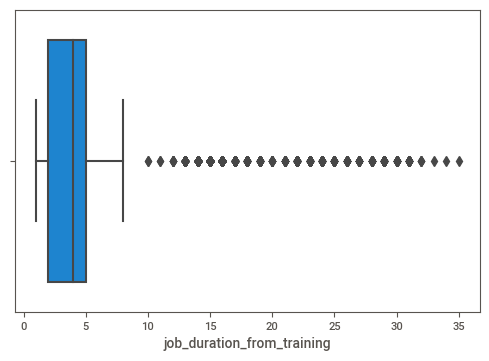

In [ ]:
sns.boxplot(df_train['job_duration_from_training'])

**Cek outlier branch_rotation**

In [ ]:
Q1 = df_train['branch_rotation'].describe()['25%']
Q3 = df_train['branch_rotation'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 4.5
lower_fence: 0.5


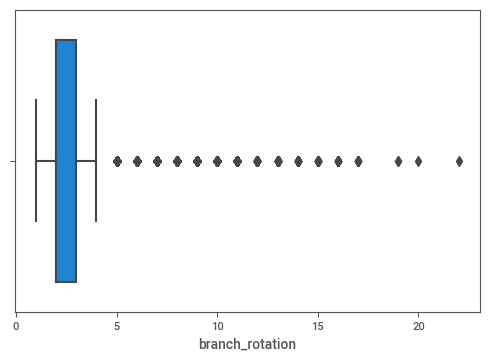

In [ ]:
sns.boxplot(df_train['branch_rotation'])

**Cek outlier job_rotation**

In [ ]:
Q1 = df_train['job_rotation'].describe()['25%']
Q3 = df_train['job_rotation'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 4.5
lower_fence: 0.5


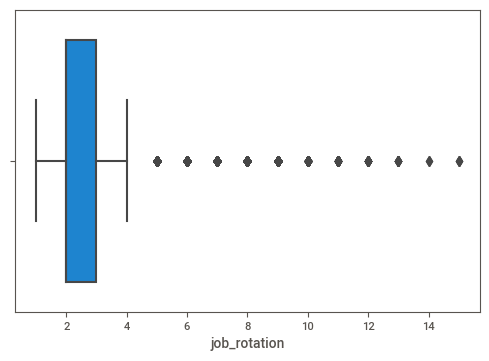

In [ ]:
sns.boxplot(df_train['job_rotation'])

**Cek outlier assign_of_otherposition**

In [ ]:
Q1 = df_train['assign_of_otherposition'].describe()['25%']
Q3 = df_train['assign_of_otherposition'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 0.0
lower_fence: 0.0


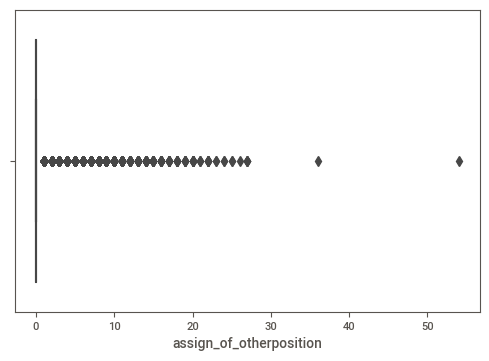

In [ ]:
sns.boxplot(df_train['assign_of_otherposition'])

**Batasi jumlah cuti**

In [ ]:
df_train = df_train[df_train['annual leave'] <= 20]

**Cek outlier sick_leaves**

In [ ]:
Q1 = df_train['sick_leaves'].describe()['25%']
Q3 = df_train['sick_leaves'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 2.5
lower_fence: -1.5


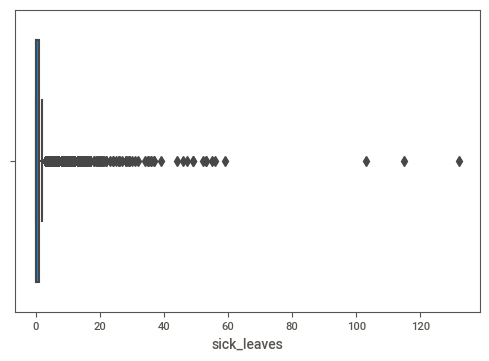

In [ ]:
sns.boxplot(df_train['sick_leaves'])

In [ ]:
Q1 = df_train['Avg_achievement_%'].describe()['25%']
Q3 = df_train['Avg_achievement_%'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 99.69166666666669
lower_fence: 32.82499999999999


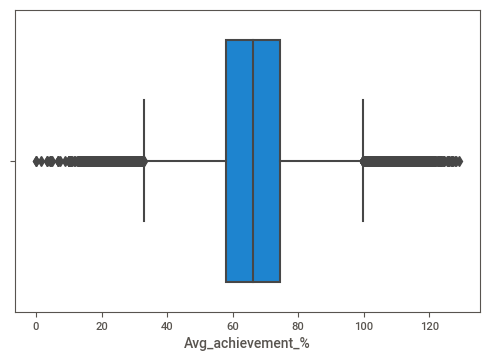

In [ ]:
sns.boxplot(df_train['Avg_achievement_%'])

**Cek outlier Last_achievement_%**

In [ ]:
Q1 = df_train['Last_achievement_%'].describe()['25%']
Q3 = df_train['Last_achievement_%'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence:', upper_fence)
print('lower_fence:', lower_fence)

upper_fence: 107.67
lower_fence: 35.510000000000005


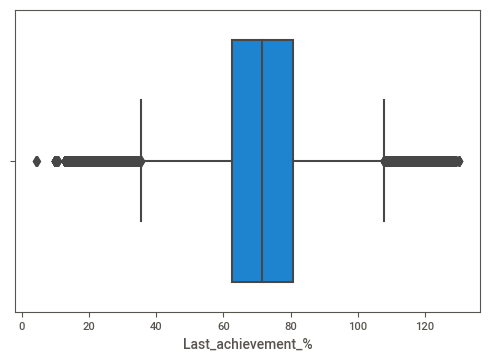

In [ ]:
sns.boxplot(df_train['Last_achievement_%'])

### X target

#### job_level X target

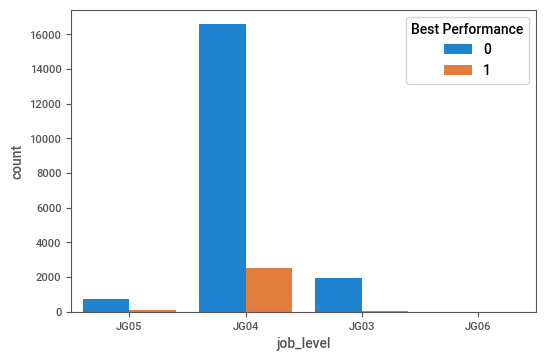

In [ ]:
sns.countplot(df_train['job_level'], hue=df_train['Best Performance'])

In [ ]:
round(pd.crosstab(df_train['job_level'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
job_level,,
JG03,8.97,0.06
JG04,75.65,11.50
JG05,3.22,0.57
JG06,0.03,0.00


#### person_level X target

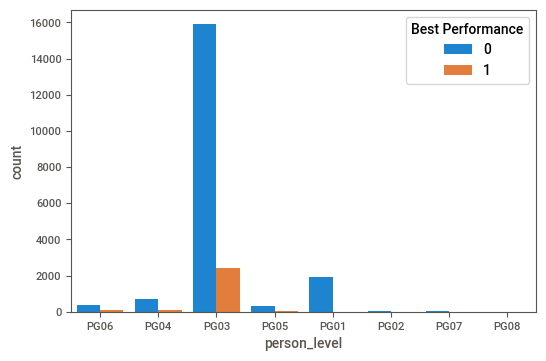

In [ ]:
sns.countplot(df_train['person_level'], hue=df_train['Best Performance'])

In [ ]:
round(pd.crosstab(df_train['person_level'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
person_level,,
PG01,8.83,0.04
PG02,0.13,0.02
PG03,72.53,10.95
PG04,3.08,0.54
PG05,1.44,0.21
PG06,1.77,0.34
PG07,0.09,0.02
PG08,0.01,0.00


#### Employee_type X target

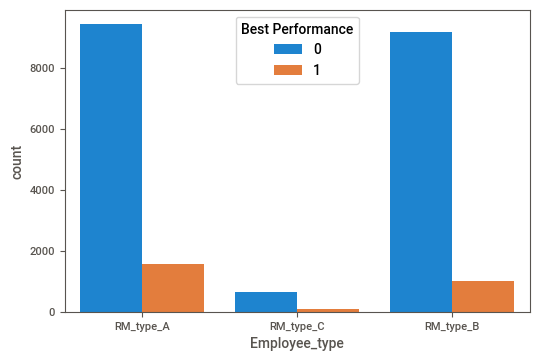

In [ ]:
sns.countplot(df_train['Employee_type'], hue=df_train['Best Performance'])

In [ ]:
round(pd.crosstab(df_train['Employee_type'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
Employee_type,,
RM_type_A,43.03,7.07
RM_type_B,41.86,4.63
RM_type_C,2.98,0.42


#### Employee_status

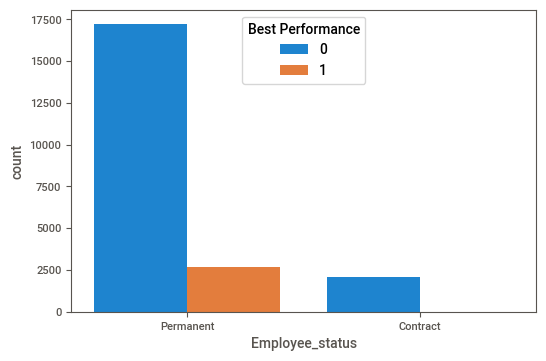

In [ ]:
sns.countplot(df_train['Employee_status'], hue=df_train['Best Performance'])

In [ ]:
round(pd.crosstab(df_train['Employee_status'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
Employee_status,,
Contract,9.37,0.00
Permanent,78.50,12.13


#### gender X target

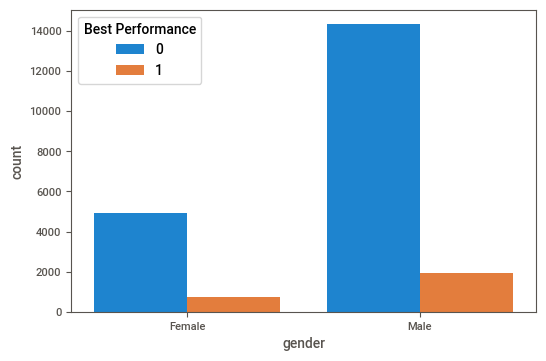

In [ ]:
sns.countplot(df_train['gender'], hue=df_train['Best Performance'])

In [ ]:
round(pd.crosstab(df_train['gender'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
gender,,
Female,22.46,3.27
Male,65.41,8.86


#### marital_status_maried(Y/N)

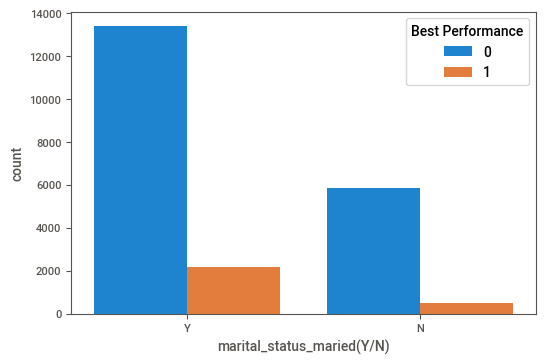

In [ ]:
sns.countplot(df_train['marital_status_maried(Y/N)'], hue=df_train['Best Performance'])

In [ ]:
round(pd.crosstab(df_train['marital_status_maried(Y/N)'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
marital_status_maried(Y/N),,
N,26.67,2.22
Y,61.20,9.91


In [ ]:
df_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3'],
      dtype='object')

#### number_of_dependences X target

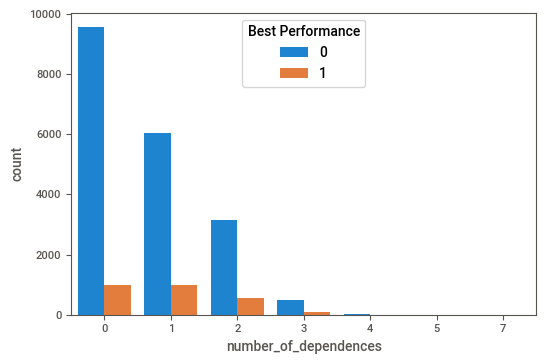

In [ ]:
sns.countplot(df_train['number_of_dependences'], hue=df_train['Best Performance'])

In [ ]:
round(pd.crosstab(df_train['number_of_dependences'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
number_of_dependences,,
0,43.62,4.57
1,27.54,4.52
2,14.36,2.58
3,2.28,0.46
4,0.05,0.00
5,0.00,0.00
7,0.00,0.00


#### Education_level X target

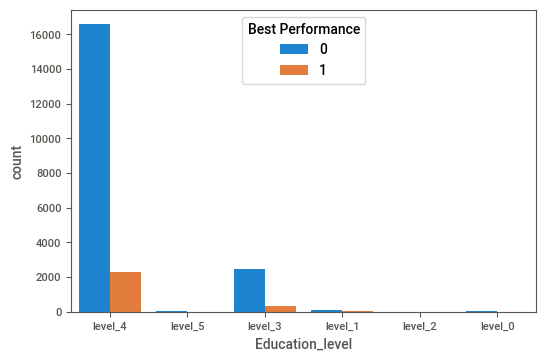

In [ ]:
sns.countplot(df_train['Education_level'], hue=df_train['Best Performance'])

In [ ]:
round(pd.crosstab(df_train['Education_level'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
Education_level,,
level_0,0.07,0.00
level_1,0.56,0.14
level_2,0.04,0.00
level_3,11.29,1.47
level_4,75.67,10.47
level_5,0.25,0.04


#### Achievement_above_100%_during3quartal X target

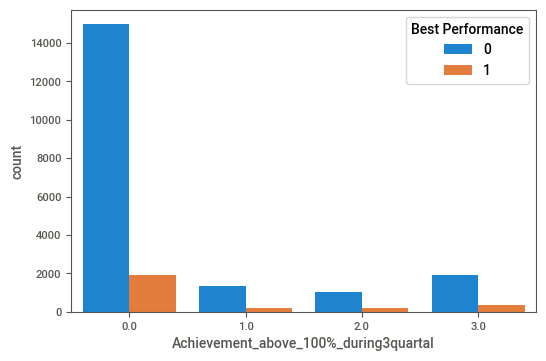

In [ ]:
sns.countplot(df_train['Achievement_above_100%_during3quartal'], hue=df_train['Best Performance'])

In [ ]:
round(pd.crosstab(df_train['Achievement_above_100%_during3quartal'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
Achievement_above_100%_during3quartal,,
0.0,68.36,8.83
1.0,6.18,0.93
2.0,4.68,0.88
3.0,8.65,1.50


#### achievement_target_1 X target

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

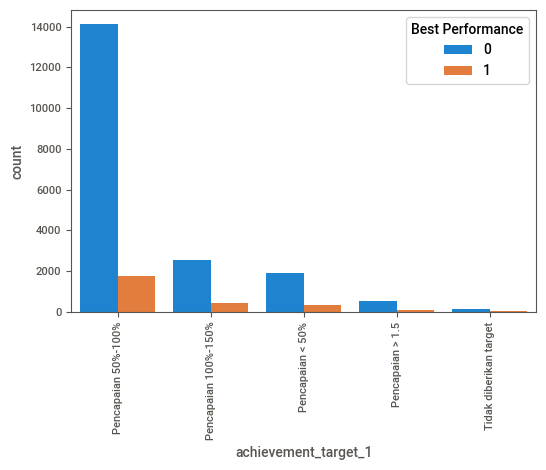

In [ ]:
sns.countplot(df_train['achievement_target_1'], hue=df_train['Best Performance'])
plt.xticks(rotation=90)

In [ ]:
round(pd.crosstab(df_train['achievement_target_1'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
achievement_target_1,,
Pencapaian 100%-150%,11.70,1.93
Pencapaian 50%-100%,64.35,8.10
Pencapaian < 50%,8.63,1.54
Pencapaian > 1.5,2.51,0.43
Tidak diberikan target,0.68,0.13


#### achievement_target_2 X target

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

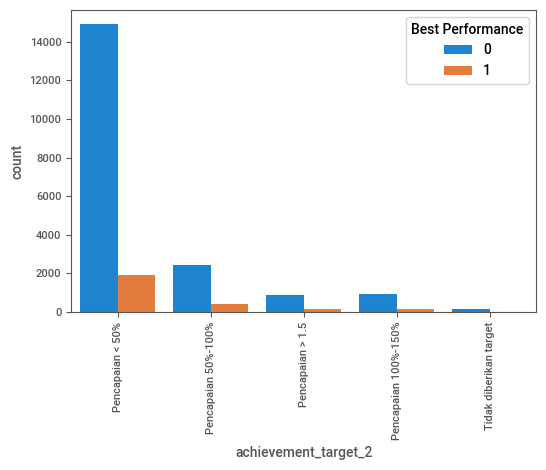

In [ ]:
sns.countplot(df_train['achievement_target_2'], hue=df_train['Best Performance'])
plt.xticks(rotation=90)

In [ ]:
round(pd.crosstab(df_train['achievement_target_2'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
achievement_target_2,,
Pencapaian 100%-150%,4.24,0.62
Pencapaian 50%-100%,11.05,1.91
Pencapaian < 50%,67.97,8.76
Pencapaian > 1.5,3.91,0.74
Tidak diberikan target,0.70,0.10


#### achievement_target_3 X target

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

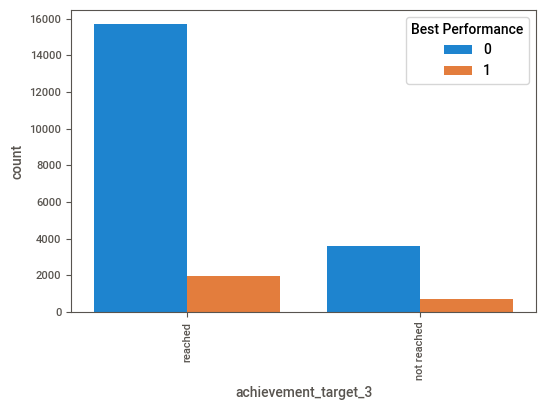

In [ ]:
sns.countplot(df_train['achievement_target_3'], hue=df_train['Best Performance'])
plt.xticks(rotation=90)

In [ ]:
round(pd.crosstab(df_train['achievement_target_3'], df_train['Best Performance'], normalize=True)*100,2)

Best Performance,0,1
achievement_target_3,,
not reached,16.32,3.18
reached,71.55,8.95


## Feature Selection and Feature Engineering

### Selection

- Dari awal mulai mengexplor data ini saya sudah melihat ada beberapa fitur yang mirip atau cenderung sama. Saat ini saya ingin pilih terlebih dahulu

In [ ]:
! pip install dython

In [ ]:
import dython
from dython.nominal import associations

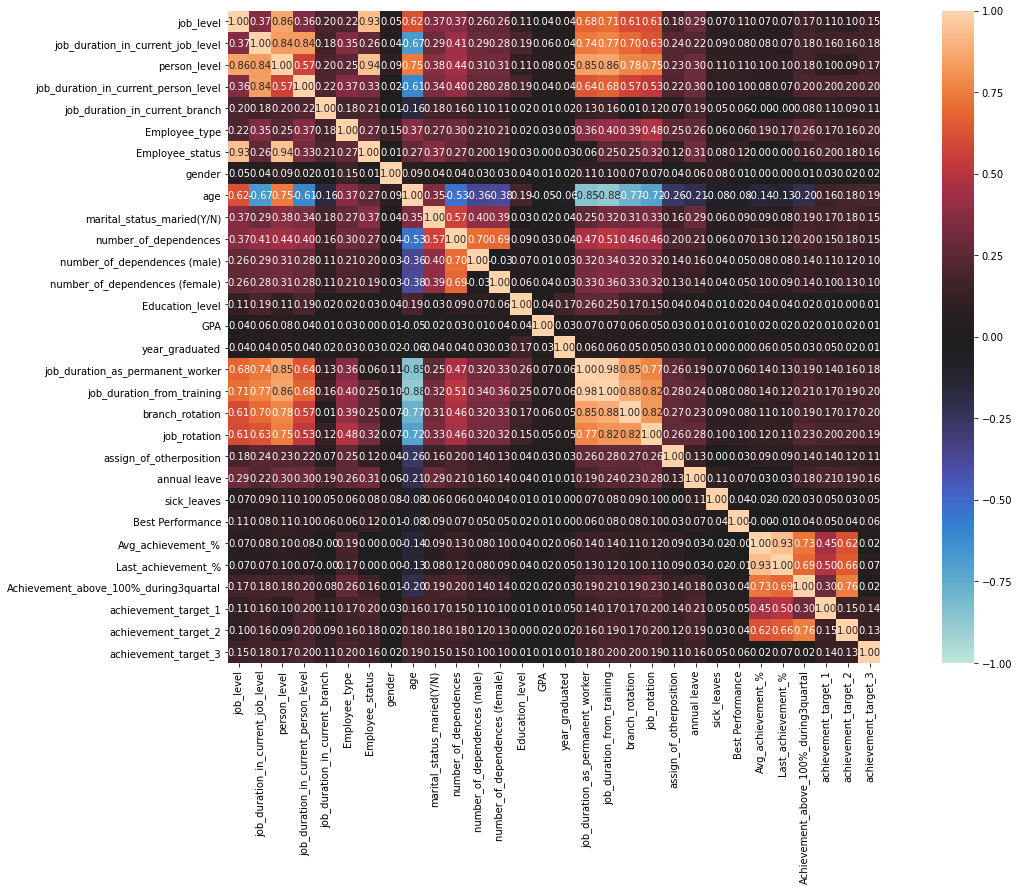

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f33166271d0>,
 'corr':                                        job_level  \
 job_level                               1.000000   
 job_duration_in_current_job_level       0.365056   
 person_level                            0.863917   
 job_duration_in_current_person_level    0.357981   
 job_duration_in_current_branch          0.196560   
 Employee_type                           0.217669   
 Employee_status                         0.932483   
 gender                                  0.054892   
 age                                     0.620152   
 marital_status_maried(Y/N)              0.365403   
 number_of_dependences                   0.373844   
 number_of_dependences (male)            0.259592   
 number_of_dependences (female)          0.262202   
 Education_level                         0.113113   
 GPA                                     0.037732   
 year_graduated                          0.040552   
 job_duration_as_permanen

In [ ]:
associations(df_train, figsize=(22,12))

In [ ]:
df = df_train.drop(columns=['job_level','person_level','job_duration_from_training','Avg_achievement_%','year_graduated','job_duration_in_current_job_level','job_duration_as_permanent_worker','branch_rotation','number_of_dependences (male)','number_of_dependences (female)','Achievement_above_100%_during3quartal','age','Last_achievement_%'])
test = df_test.drop(columns=['job_level','person_level','job_duration_from_training','Avg_achievement_%','year_graduated','job_duration_in_current_job_level','job_duration_as_permanent_worker','branch_rotation','number_of_dependences (male)','number_of_dependences (female)','Achievement_above_100%_during3quartal','age','Last_achievement_%'])

### Engineering

In [ ]:
df

,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,achievement_target_1,achievement_target_2,achievement_target_3
0,8.00,0.50,RM_type_A,Permanent,Female,Y,3,level_4,2.32,7,0,8,0,0,Pencapaian 50%-100%,Pencapaian < 50%,reached
1,2.00,1.25,RM_type_A,Permanent,Male,Y,3,level_4,3.25,7,9,3,0,0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
2,1.83,1.50,RM_type_A,Permanent,Male,Y,1,level_5,3.23,9,0,6,0,0,Pencapaian 100%-150%,Pencapaian < 50%,not reached
3,4.00,0.17,RM_type_A,Permanent,Male,Y,0,level_3,0.00,5,0,3,0,0,Pencapaian 50%-100%,Pencapaian 50%-100%,not reached
4,1.83,2.08,RM_type_A,Permanent,Male,Y,1,level_4,3.09,6,11,2,1,1,Pencapaian < 50%,Pencapaian > 1.5,not reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1.50,3.42,RM_type_B,Permanent,Male,Y,1,level_4,2.84,2,0,2,0,0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22001,0.42,0.42,RM_type_B,Contract,Male,N,0,level_4,3.28,1,0,0,0,0,Pencapaian 50%-100%,Pencapaian < 50%,reached
22002,1.50,0.00,RM_type_A,Permanent,Male,Y,2,level_4,3.10,4,0,3,2,0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22003,1.50,0.00,RM_type_A,Permanent,Male,Y,1,level_4,3.69,4,0,13,0,0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached


- Label Encoding: 'Employee_status','gender','marital_status_maried(Y/N)','achievement_target_1','achievement_target_2','achievement_target_3'

- One-hot Encoding: 'Employee_type','number_of_dependences','Education_level'

**Label Encoding**

In [ ]:
df['Employee_status'] = df['Employee_status'].map({'Permanent':0, 'Contract':1})
df['gender'] = df['gender'].map({'Female':0, 'Male':1})
df['marital_status_maried(Y/N)'] = df['marital_status_maried(Y/N)'].map({'N':0, 'Y':1})
df['achievement_target_1'] = df['achievement_target_1'].map({'Tidak diberikan target':0, 'Pencapaian > 1.5':1, 'Pencapaian < 50%':2, 'Pencapaian 50%-100%':3, 'Pencapaian 100%-150%':4})
df['achievement_target_2'] = df['achievement_target_2'].map({'Tidak diberikan target':0, 'Pencapaian > 1.5':1, 'Pencapaian < 50%':2, 'Pencapaian 50%-100%':3, 'Pencapaian 100%-150%':4})
df['achievement_target_3'] = df['achievement_target_3'].map({'not reached':0, 'reached':1})

In [ ]:
test['Employee_status'] = test['Employee_status'].map({'Permanent':0, 'Contract':1})
test['gender'] = test['gender'].map({'Female':0, 'Male':1})
test['marital_status_maried(Y/N)'] = test['marital_status_maried(Y/N)'].map({'N':0, 'Y':1})
test['achievement_target_1'] = test['achievement_target_1'].map({'Tidak diberikan target':0, 'Pencapaian > 1.5':1, 'Pencapaian < 50%':2, 'Pencapaian 50%-100%':3, 'Pencapaian 100%-150%':4})
test['achievement_target_2'] = test['achievement_target_2'].map({'Tidak diberikan target':0, 'Pencapaian > 1.5':1, 'Pencapaian < 50%':2, 'Pencapaian 50%-100%':3, 'Pencapaian 100%-150%':4})
test['achievement_target_3'] = test['achievement_target_3'].map({'not reached':0, 'reached':1})

**One-hot Encoding**

In [ ]:
df = pd.get_dummies(data=df, columns=['Employee_type','Education_level'])

In [ ]:
test = pd.get_dummies(data=test, columns=['Employee_type','Education_level'])

In [ ]:
df.shape, test.shape

((21993, 24), (6000, 23))

**Splitting**

In [ ]:
X = df.drop(columns=['Best Performance'])
y = df['Best Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=.80, random_state=42)

## Random Over Sampling

In [ ]:
df_gabung = pd.concat([X_train, y_train], axis=1)
df_gabung.head()

,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_status,gender,marital_status_maried(Y/N),number_of_dependences,GPA,job_rotation,assign_of_otherposition,annual leave,sick_leaves,achievement_target_1,achievement_target_2,achievement_target_3,Employee_type_RM_type_A,Employee_type_RM_type_B,Employee_type_RM_type_C,Education_level_level_0,Education_level_level_1,Education_level_level_2,Education_level_level_3,Education_level_level_4,Education_level_level_5,Best Performance
3737,2.17,0.50,0,1,1,1,3.67,4,6,2,0,4,3,0,1,0,0,0,0,0,0,1,0,0
6040,1.58,0.33,0,0,1,1,3.47,2,0,4,0,3,3,1,1,0,0,0,0,0,0,1,0,0
17993,0.58,0.58,0,1,0,0,3.65,1,0,0,0,3,2,1,0,1,0,0,0,0,0,1,0,0
549,1.83,0.50,0,1,1,0,2.93,5,0,7,0,3,2,1,1,0,0,0,0,0,0,1,0,0
5787,0.75,0.50,0,1,0,0,3.53,2,0,0,0,3,2,1,1,0,0,0,0,0,0,1,0,0


In [ ]:
df_gabung['Best Performance'].value_counts()

0    15460
1     2134
Name: Best Performance, dtype: int64

In [ ]:
notbest = df_gabung[df_gabung['Best Performance'] == 0]
best = df_gabung[df_gabung['Best Performance'] == 1]

In [ ]:
from sklearn.utils import resample

In [ ]:
best_oversample = resample(best, ## Kelas Minority
                           replace=True,
                           n_samples = len(notbest), ## Jumlah dari Kelas Majority
                           random_state = 42)

In [ ]:
df_os = pd.concat([notbest, best_oversample])

In [ ]:
df_os['Best Performance'].value_counts()

1    15460
0    15460
Name: Best Performance, dtype: int64

In [ ]:
X_train = df_os.drop(columns='Best Performance')
y_train = df_os['Best Performance']

## Machine Learning Base

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_lr = lr.predict_proba(X_test)
y_train_lr = lr.predict_proba(X_train)

In [ ]:
pred_lr = y_lr[:,1]
pred_train_lr = y_train_lr[:,1]

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, pred_lr)
score_auc_lr = round(auc(fpr, tpr),2)
print('score_auc_lr: ', score_auc_lr)

score_auc_lr:  0.62


In [ ]:
fpr, tpr, threshold = roc_curve(y_train, pred_train_lr)
score_auc_train_lr = round(auc(fpr, tpr),2)
print('score_auc_train_lr: ', score_auc_train_lr)

score_auc_train_lr:  0.62


### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_rf = rf.predict_proba(X_test)
y_train_rf = rf.predict_proba(X_train)

In [ ]:
pred_rf = y_rf[:,1]
pred_train_rf = y_train_rf[:,1]

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, pred_rf)
score_auc_rf = round(auc(fpr, tpr),2)
print('score_auc_rf: ', score_auc_rf)

score_auc_rf:  0.63


In [ ]:
fpr, tpr, threshold = roc_curve(y_train, pred_train_rf)
score_auc_train_rf = round(auc(fpr, tpr),2)
print('score_auc_train_rf: ', score_auc_train_rf)

score_auc_train_rf:  1.0


### XGB

In [ ]:
xc = XGBClassifier()
xc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_xc = xc.predict_proba(X_test)
y_train_xc = xc.predict_proba(X_train)

In [ ]:
pred_xc = y_xc[:,1]
pred_train_xc = y_train_xc[:,1]

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, pred_xc)
score_auc_xc = round(auc(fpr, tpr),2)
print('score_auc_xc: ', score_auc_xc)

score_auc_xc:  0.66


In [ ]:
fpr, tpr, threshold = roc_curve(y_train, pred_train_xc)
score_auc_train_xc = round(auc(fpr, tpr),2)
print('score_auc_train_xc: ', score_auc_train_xc)

score_auc_train_xc:  0.72


### XGB Tuned 1.1

In [ ]:
xct = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
xct.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=10,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [ ]:
y_xct = xct.predict_proba(X_test)
y_train_xct = xct.predict_proba(X_train)

In [ ]:
pred_xct = y_xct[:,1]
pred_train_xct = y_train_xct[:,1]

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, pred_xct)
score_auc_xct = round(auc(fpr, tpr),2)
print('score_auc_xct: ', score_auc_xct)

score_auc_xct:  0.67


In [ ]:
fpr, tpr, threshold = roc_curve(y_train, pred_train_xct)
score_auc_train_xct = round(auc(fpr, tpr),2)
print('score_auc_train_xct: ', score_auc_train_xct)

score_auc_train_xct:  0.74
